In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px


pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('..\zoopla_scraper\zoopla_scraper\spiders\zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)

#Converting string data to datetime.date
data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from']=data['available_from'].dt.date
data['incorporation_date']=pd.to_datetime(data['incorporation_date'],errors='coerce')
data['incorporation_date']=data['incorporation_date'].dt.date

data.shape

C:\Users\usuario\AppData\Local\Temp\ipykernel_5216\3944202515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_no_na['waiting_period_days']=data_with_no_na['available_from']-data_with_no_na['incorporation_date']
C:\Users\usuario\AppData\Local\Temp\ipykernel_5216\3944202515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_no_na['waiting_period_days']=data_with_no_na['waiting_period_days'].apply(lambda x: x.days)


Text(0.5, 1.0, 'Waiting time distribution [days]')

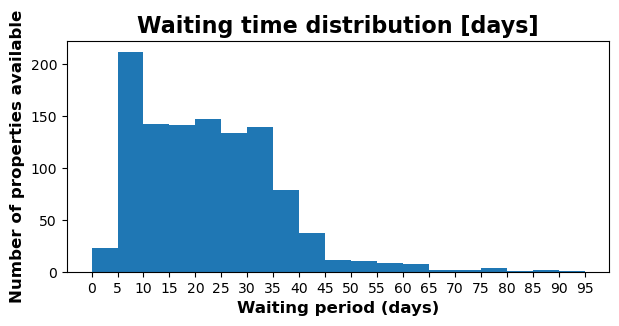

In [ ]:
#Most of the properties are available in the first 40 days of publication
fig,ax=plt.subplots(figsize=(7,3))

data_with_no_na=data[data['available_from'].notna()]
data_with_no_na['waiting_period_days']=data_with_no_na['available_from']-data_with_no_na['incorporation_date']
data_with_no_na['waiting_period_days']=data_with_no_na['waiting_period_days'].apply(lambda x: x.days)
waiting_period_days_after_3_days=data_with_no_na.query("waiting_period_days<100 & waiting_period_days>3")['waiting_period_days']


ax.hist(waiting_period_days_after_3_days,bins=range(0,100,5))

ax.set_xlabel('Waiting period (days)',fontsize=12,fontweight='heavy')
ax.set_xticks(np.arange(0,100,5))

ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Waiting time distribution [days]',fontsize=16,fontweight='heavy')




In [ ]:
#Splitting the properties in four different segments accoirding to their price

data_500_1000=data.query('price>500 & price<=1000')
data_1000_1500=data.query('price>1000 & price<=1500')
data_1500_2000=data.query('price>1500 & price<=2000')
data_2000_3000=data.query('price>2000 & price<=3000')

data_with_no_na_500_1000=data_with_no_na.query('price>500 & price<=1000')
data_with_no_na_1000_1500=data_with_no_na.query('price>1000 & price<=1500')
data_with_no_na_1500_2000=data_with_no_na.query('price>1500 & price<=2000')
data_with_no_na_2000_3000=data_with_no_na.query('price>2000 & price<=3000')

Text(0.5, 0, 'Availability (2000-3000pcm) [days]')

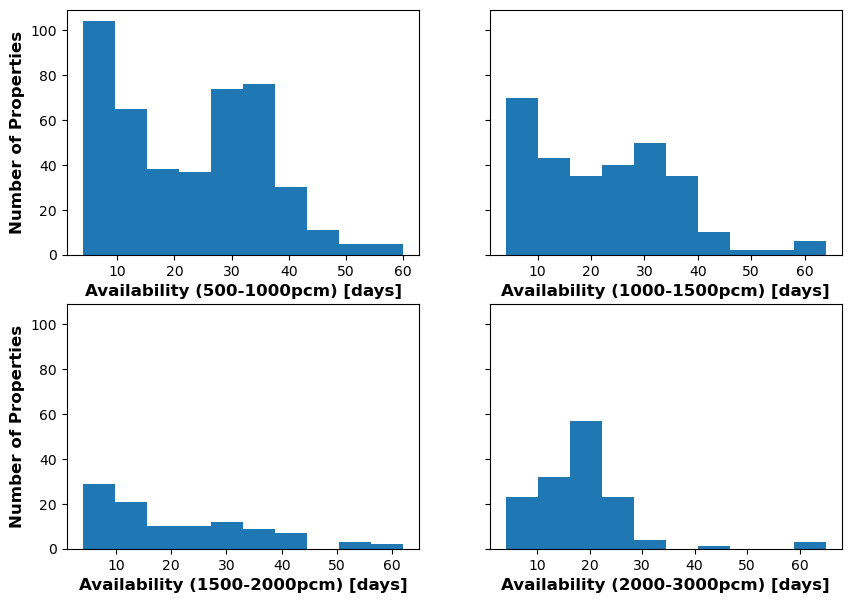

In [ ]:
#If we segment the properties by price there is no relevant difference in the waiting time for properties worth
#below 1500 pounds. For properties worth above 1500 pounds there are less immediately available properties but
#most of them can be occupied within 40 days

fig,ax=plt.subplots(2,2,figsize=(10,7),sharey=True)
ax[0,0].hist(data_with_no_na_500_1000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[0,1].hist(data_with_no_na_1000_1500.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,0].hist(data_with_no_na_1500_2000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])
ax[1,1].hist(data_with_no_na_2000_3000.query('waiting_period_days>3 & waiting_period_days<70')['waiting_period_days'])

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')

ax[0,0].set_xlabel('Availability (500-1000pcm) [days]',fontsize=12,fontweight='heavy')
ax[0,1].set_xlabel('Availability (1000-1500pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Availability (1500-2000pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Availability (2000-3000pcm) [days]',fontsize=12,fontweight='heavy')

#Seems that in most cases the properties are available to be taken in the first 30 days,
#except for the properties above 2000pcm. The waiting time is under 20 days for most of them